In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters 
    "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))

    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    print(guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, 
            "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [4]:
koi3678 = pd.read_csv('./TTVs/koi3678.csv')
koi3762 = pd.read_csv('./TTVs/koi3762.csv')

koi3678 = koi3678.rename(columns={'Unnamed: 0': "epoch"})
koi3762 = koi3762.rename(columns={'Unnamed: 0': "epoch"})



In [5]:
koi3678.keys

<bound method NDFrame.keys of    epoch  tts_median [KBJD]  tts_err lower [days]  tts_err upper [days]  \
0      0         277.505582              0.000479              0.000487   
1      1         438.387944              0.000535              0.000540   
2      2         599.277693              0.001527              0.001480   
3      3         760.154145              0.000625              0.000677   
4      4         921.045690              0.000320              0.000363   
5      5        1081.929458              0.000518              0.000450   
6      6        1242.809227              0.000473              0.000393   
7      7        1403.701858              0.000379              0.000464   
8      8        1564.577558              0.000285              0.000332   

   ttvs_median [min]   ttvs_err lower [min]  ttvs_err upper [min]  \
0            0.260800              0.634757              0.732586   
1           -2.711733              0.783497              0.775482   
2           

Text(0.5, 0, 'time [KBJD]')

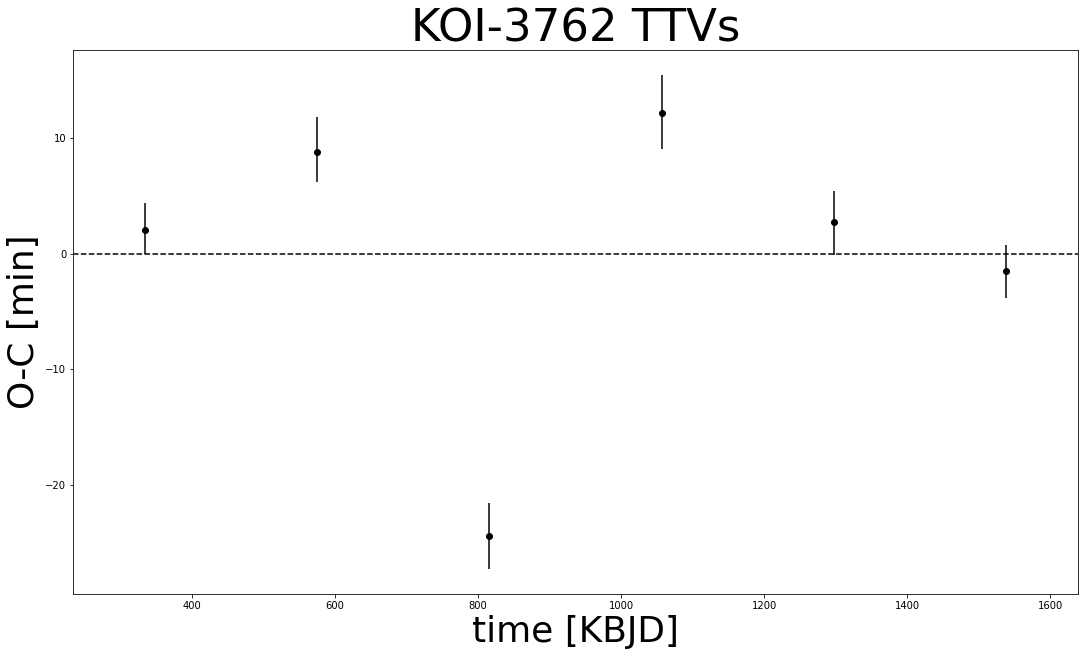

In [6]:
plt.figure(figsize = [18,10])
plt.errorbar(koi3762['tts_median [KBJD]'], koi3762['ttvs_median [min] '], 
             yerr=np.array([koi3762['ttvs_err lower [min]'], koi3762['ttvs_err upper [min]']]),
             ls='', marker='o', color = 'k')
plt.hlines(0, 0, 2*np.max(koi3762['tts_median [KBJD]']), 'k', ls='dashed')
plt.xlim(np.min(koi3762['tts_median [KBJD]']) - 100, np.max(koi3762['tts_median [KBJD]']) + 100)

plt.title('KOI-3762 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)



Text(0.5, 0, 'time [KBJD]')

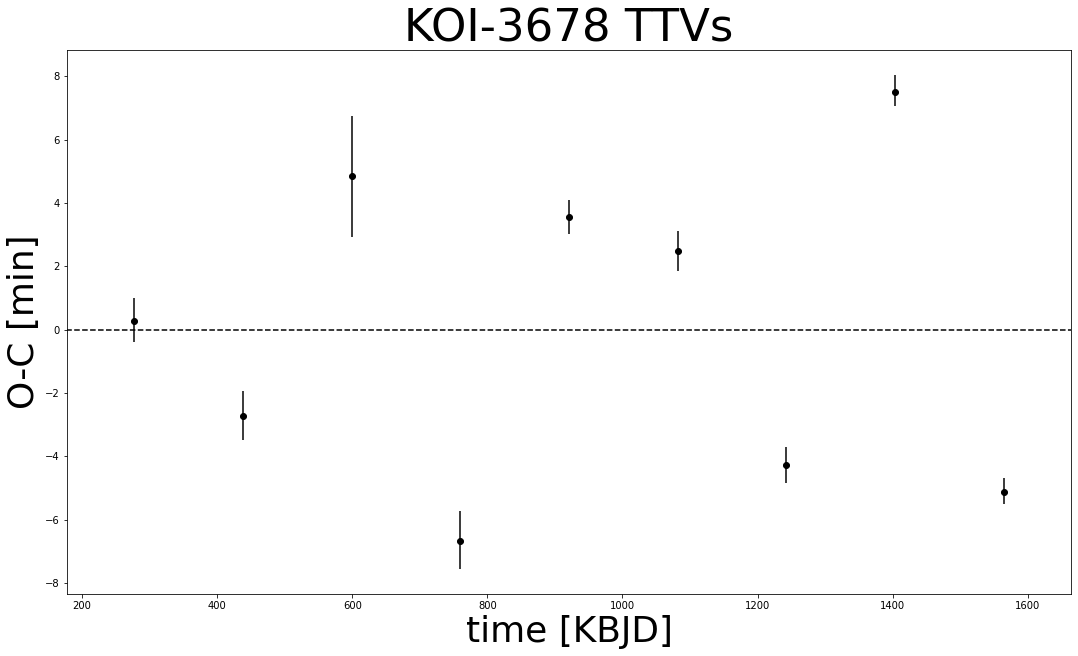

In [9]:
plt.figure(figsize = [18,10])
plt.errorbar(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] '], 
             yerr=np.array([koi3678['ttvs_err lower [min]'], koi3678['ttvs_err upper [min]']]),
             ls='', marker='o', color = 'k')
plt.hlines(0, 0, 2*np.max(koi3678['tts_median [KBJD]']), 'k', ls='dashed')
plt.xlim(np.min(koi3678['tts_median [KBJD]']) - 100, np.max(koi3678['tts_median [KBJD]']) + 100)


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)





In [8]:
import scipy.optimize

def FFT(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters 
    "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))

    freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    
    return 1/freq
    
    '''
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    print(guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, 
            "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}
    '''

{'index': 25, 'log_power': 2.357046351593297, 'period': 265.22468668369294, 'period_uncert': 18.07279549691639}


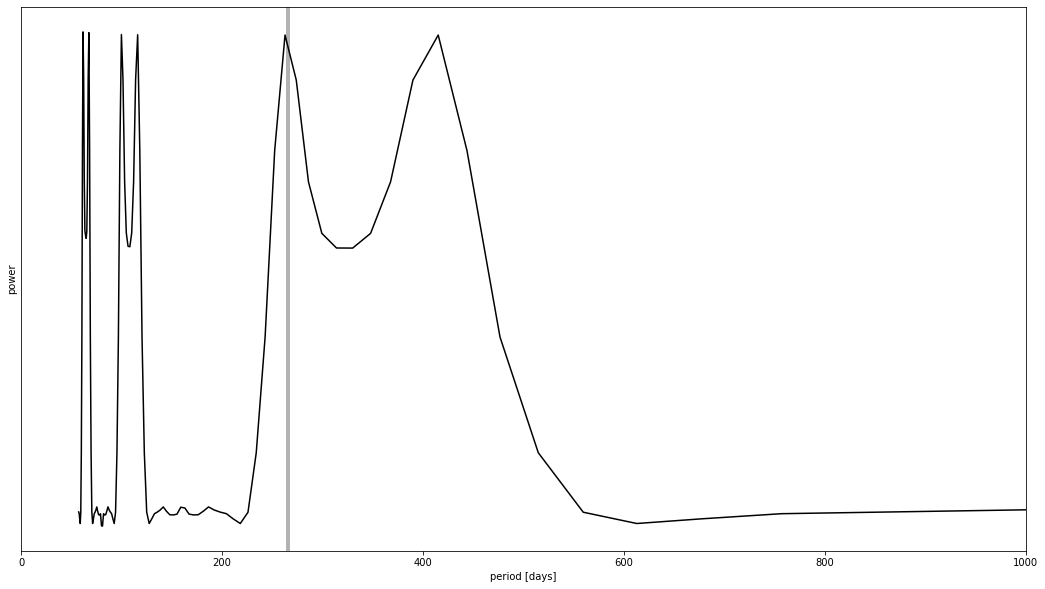

In [9]:
import exoplanet as xo

results = xo.estimators.lomb_scargle_estimator(
    koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] '], max_peaks=10)
peak = results["peaks"][4]
print(peak)
freq, power = results["periodogram"]

plt.figure(figsize=[18,10])

plt.plot(1 / freq, power, "k")
plt.axvline(peak["period"], color="k", lw=4, alpha=0.3)
plt.xlim(0,1000)
plt.yticks([])
plt.xlabel("period [days]")
_ = plt.ylabel("power")



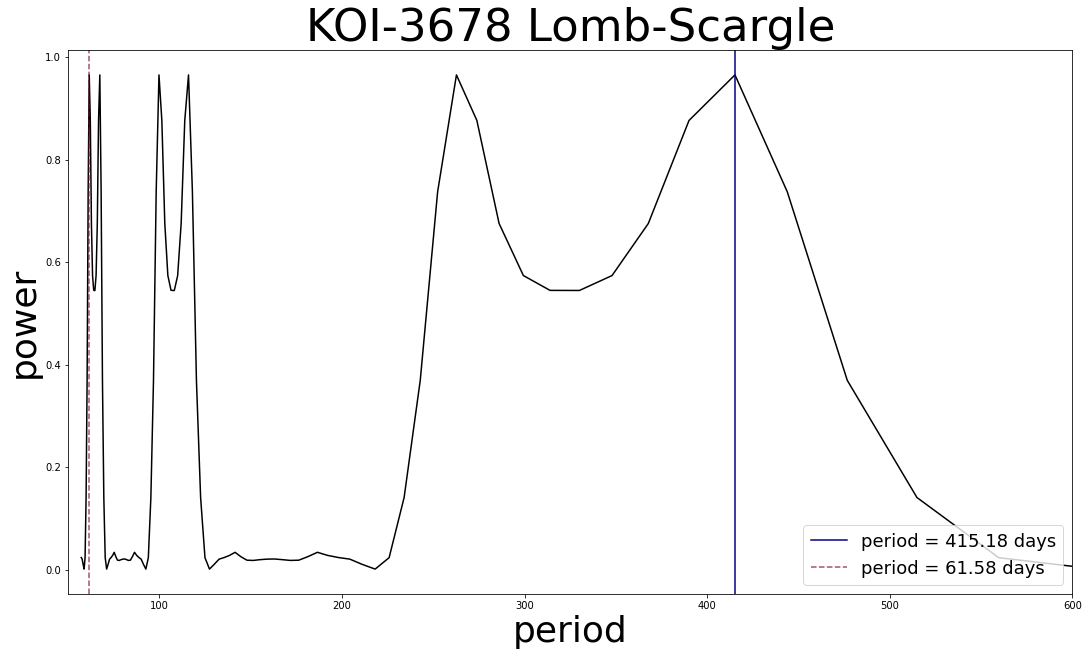

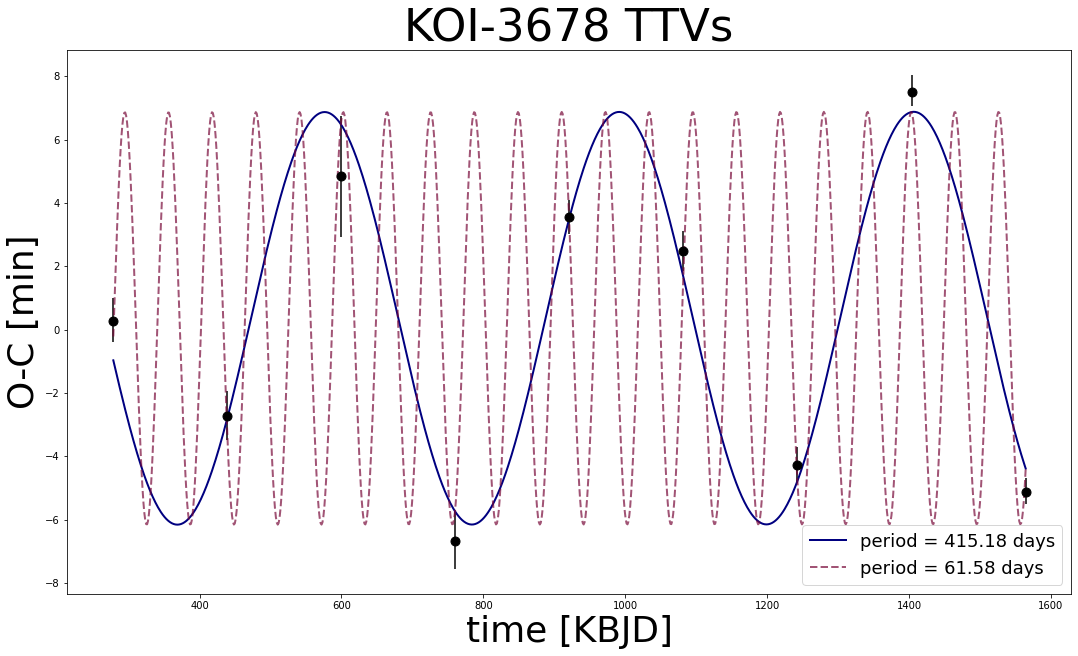

In [32]:
p_koi3678 = 160.8845
epochs = np.arange(1, len(koi3678['tts_median [KBJD]'])+1, 1)

epochs_plot = np.linspace(1, len(koi3678['tts_median [KBJD]'])+1, 1000)
x_plot = np.linspace(np.min(koi3678['tts_median [KBJD]'])+1, np.max(koi3678['tts_median [KBJD]']), 1000)

koi3678['tts_median [KBJD]']



from astropy.timeseries import LombScargle
from scipy.optimize import minimize


koi3678_ttvs_err = np.mean([koi3678['ttvs_err lower [min]'].values, koi3678['ttvs_err upper [min]'].values])

frequency, power = LombScargle(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] ']).autopower()
plt.figure(figsize=[18,10])
plt.plot(1/frequency, power, 'k')

'''
colorsss = ['r', 'b', 'g', 'y', 'c']
for ii in range(0,5):
    freq = frequency[np.argsort(power)[-ii]]
    plt.axvline(1/freq, 0, 1, label = str(ii) + 'th best period = ' + str(1/freq), color = colorsss[ii])
'''
plt.axvline(1/frequency[np.argsort(power)[-4]], 0, 1, label = 'period = ' + str(np.round(1/frequency[np.argsort(power)[-4]], 2)) + ' days', color = '#000080')
plt.axvline(1/frequency[np.argmax(power)], 0, 1, label = 'period = ' + str(np.round(1/frequency[np.argmax(power)], 2)) + ' days', color = '#770737', alpha=0.69, ls='--')


plt.xlim(50,600)
plt.title('KOI-3678 Lomb-Scargle', fontsize = 45)
plt.xlabel('period', fontsize = 36)
plt.ylabel('power', fontsize = 36)
plt.legend(fontsize = 18, loc=4)

#plt.savefig('koi3678_lomb_scargle.pdf')
plt.show()





#### plot data
plt.figure(figsize=[18,10])
plt.errorbar(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] '], 
         yerr=np.array([koi3678['ttvs_err lower [min]'], koi3678['ttvs_err upper [min]']]),
         ls='', marker='o', color = 'k', ms=9)

###define driver function for scipy.minimize
def driver_func(x, x_obs, ttv_obs):

    # Evaluate the fit function with the current parameter estimates

    ttv_new = sinusoid(x_obs, *x)
    ttv_err = np.sum((ttv_new - ttv_obs) ** 2)

    return ttv_err







#### fit and plot long period P_ttv model
long_period_frequency = frequency[np.argsort(power)[-4]]
P_ttv = 1./long_period_frequency

def sinusoid(n, Tau, P, A_ttv, phi_ttv):
    sin = Tau + P*n + A_ttv*np.sin((2* np.pi*n)/(P_ttv) + phi_ttv)
    return sin

res = minimize(driver_func, np.array([0, 0, 0, 0]), args=(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] ']))

ynw2 = sinusoid(x_plot, *res.x)
plt.plot(x_plot, ynw2, '-', color = '#000080', lw=2, label = 'period = ' + str(np.round(P_ttv, 2)) + ' days')






#### fit and plot short period P_ttv model
short_period_frequency = frequency[np.argmax(power)]
P_ttv = 1./short_period_frequency

def sinusoid(t, Tau, P, A_ttv, phi_ttv):
    sin = Tau + P*t + A_ttv*np.sin((2* np.pi*t)/(P_ttv) + phi_ttv)
    return sin

res = minimize(driver_func, np.array([0, 0, 0, 0]), args=(koi3678['tts_median [KBJD]'], koi3678['ttvs_median [min] ']))

ynw2 = sinusoid(x_plot, *res.x)
plt.plot(x_plot, ynw2, color = '#770737', lw=2, alpha=0.69, ls='--', label = 'period = ' + str(np.round(P_ttv, 2)) + ' days')








plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)
plt.legend(fontsize = 18, loc=4)

plt.savefig('koi3678_ttvfit.pdf')
plt.show()



## Pull in KOI3678 transit median values

In [41]:
ttv_data = pd.read_csv('./TTVs/koi3678.csv')


ttv_data_times =  ttv_data['tts_median [KBJD]']
ttv_data_ttvs =  ttv_data['ttvs_median [min] ']

ttv_data_times_err =  np.array([ttv_data['tts_err lower [days]'],
                                ttv_data['tts_err upper [days]']])

ttv_data_ttvs_err =  np.array([ttv_data['ttvs_err lower [min]'],
                               ttv_data['ttvs_err upper [min]']])

koi3678_period = ttv_data['P_median [days]'][0]
koi3678_t0 = ttv_data['t0_median [KBJD]'][0]

## Pull in KOI3678 SWIFT MAP model

In [87]:
ttv_fit = pd.read_csv('./SWIFT/koi3678_posterior_forecaster/MAP_times.txt')

ttv_fit_times = ttv_fit['MAP times in KBJD-277:'].values+277



time = koi3678_t0
ttv_fit_ttvs=[]
for ii in range(0, len(ttv_fit_times)):
    ttv_fit_ttvs.append((ttv_fit_times[ii]-time)*24*60)
    
    time += koi3678_period

## Pull in LUNA MAP results

In [88]:
ttv_luna_times = np.array([55110.5053980755, 55271.387750126465, 55432.27927184613,55593.154983394976, 
                           55754.0458671042, 55914.92908921068, 56075.80890208772, 56236.70173781406, 56397.57792229926])
ttv_luna_times = ttv_luna_times-54833

time = koi3678_t0
ttv_luna_ttvs=[]
for ii in range(0, len(ttv_luna_times)):
    ttv_luna_ttvs.append((ttv_luna_times[ii]-time)*24*60)
    
    time += koi3678_period
    

## plot it all

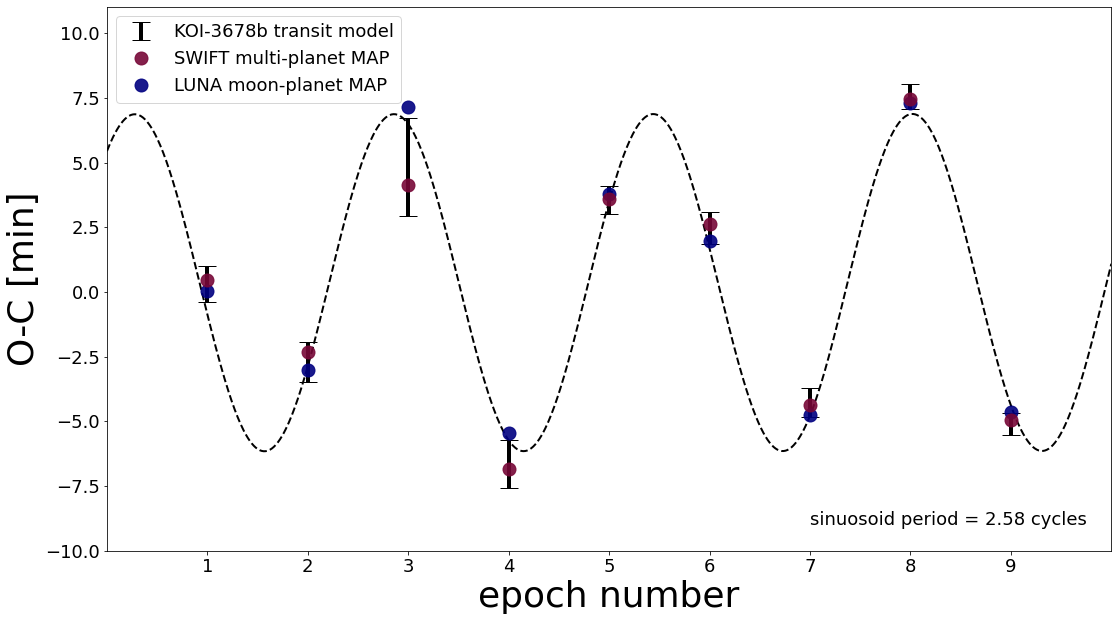

In [126]:
epochs = np.arange(1, len(koi3678['tts_median [KBJD]'])+1, 1)

epochs_plot = np.linspace(0, len(koi3678['tts_median [KBJD]'])+1, 1000)
x_plot = np.linspace(np.min(koi3678['tts_median [KBJD]'])+1, np.max(koi3678['tts_median [KBJD]']), 1000)


frequency, power = LombScargle(epochs, koi3678['ttvs_median [min] ']).autopower()



plt.figure(figsize=[18,10])
#### fit and plot long period P_ttv model
long_period_frequency = frequency[np.argsort(power)[-3]]
P_ttv = 1./long_period_frequency



def sinusoid(n, Tau, P, A_ttv, phi_ttv):
    sin = Tau + P*n + A_ttv*np.sin((2* np.pi*n)/(P_ttv) + phi_ttv)
    return sin

res = minimize(driver_func, np.array([0, 0, 0, 0]), args=(epochs, koi3678['ttvs_median [min] ']))

ynw2 = sinusoid(epochs_plot, *res.x)
plt.plot(epochs_plot, ynw2, '--', color = 'k', lw=2, zorder=1)





plt.errorbar(epochs, ttv_data_ttvs, yerr = ttv_data_ttvs_err, ls= '', lw=4, marker='', capsize=9, color = 'k', ms=7, label='KOI-3678b transit model', zorder=2)
plt.plot(epochs, ttv_fit_ttvs, 'o', ms=13, color='#770737', label = 'SWIFT multi-planet MAP', zorder=4, alpha=0.9)
plt.plot(epochs, ttv_luna_ttvs, 'o', ms=13, color='#000080', label = 'LUNA moon-planet MAP', zorder=3, alpha=0.9)


#plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('epoch number', fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=2, fontsize=18)

plt.ylim(-10,11)
plt.xlim(0,10)
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.text(7, -9, 'sinuosoid period = ' + str(np.round(P_ttv, 2)) + ' cycles', fontsize=18)


plt.savefig('koi3678_compare_fits.pdf')